![Logo](https://www.up.edu.mx/wp-content/themes/panamericana/img/logo-footer.png)

# **Tarea 6: Regresión Lineal Múltiple**

## **Asignatura:** Econometría  
## **Profesora:** Mae. Julieta María Sarralde Vera

---

**Nombre del Alumno:**  
Luis Enrique Noguera Gil

**Fecha de entrega:**  
08 de septiembre de 2024


# Auto reload modules

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import scripts.index as index
from scipy.stats import t
from scipy import stats
import fs

In [4]:
MAIN_DIR = fs.open_fs("../../data/raw/HW06")
T7_6_DIR = MAIN_DIR.getsyspath("Table 7_6.xls")
T7_8_DIR = MAIN_DIR.getsyspath("Table 7_8.xls")
T7_12_DIR = MAIN_DIR.getsyspath("Table 7_12.xls")

In [6]:
DIR = fs.open_fs(".")
NB_DIR = DIR.getsyspath("0.0-leng-HW06.ipynb")

# Extrae los encabezados y genera el índice
headings = index.extract_headings(NB_DIR)
toc = index.generate_toc(headings)

# Muestra el índice generado
# print(toc)

- [**Tarea 6: Regresión Lineal Múltiple**](#**tarea-6:-regresión-lineal-múltiple**)
  - [**Asignatura:** Econometría](#**asignatura:**-econometría)
  - [**Profesora:** Mae. Julieta María Sarralde Vera](#**profesora:**-mae.-julieta-maría-sarralde-vera)
- [Auto reload modules](#auto-reload-modules)
- [1. Estimación de Regresiones](#1.-estimación-de-regresiones)
    - [a) ¿Es $ \alpha_2 = \beta_2 $? ¿Por qué?](#a))
    - [b) ¿Es $ \lambda_3 = \beta_3 $? ¿Por qué?](#b))
- [2. La demanda de rosas](#2.-la-demanda-de-rosas)
    - [a) Estime los parámetros del modelo lineal e interprete los resultados.](#a-estime-los-parámetros-del-modelo-lineal-e-interprete-los-resultados.)
    - [b) Estime los parámetros del modelo log-lineal e interprete los resultados.](#b-estime-los-parámetros-del-modelo-log-lineal-e-interprete-los-resultados.)
    - [c) $ \beta_2 $, $ \beta_3 $ y $ \beta_4 $ dan respectivamente las elasticidades de la demanda respecto del precio propio, precio cruzado e ingreso. ¿Cuáles son, a priori, los signos de estas elasticidades? ¿Concuerdan estos resultados con las expectativas a priori?](#-$-\beta_2-$,-$-\beta_3-$-y-$-\beta_4-$-dan-respectivamente-las-elasticidades-de-la-demanda-respecto-del-precio-propio,-precio-cruzado-e-ingreso.-¿cuáles-son,-a-priori,-los-signos-de-estas-elasticidades?-¿concuerdan-estos-resultados-con-las-expectativas-a-priori?)
    - [d) ¿Cómo calcularía las elasticidades precio propio, precio cruzado e ingreso en el modelo lineal?](#d-¿cómo-calcularía-las-elasticidades-precio-propio,-precio-cruzado-e-ingreso-en-el-modelo-lineal?)
    - [e) Con base en el análisis, ¿cuál modelo, si existe, escogería y por qué?](#e-con-base-en-el-análisis,-¿cuál-modelo,-si-existe,-escogería-y-por-qué?)
- [3. Desembolsos del presupuesto de defensa de Estados Unidos, 1962-1981](#3.-desembolsos-del-presupuesto-de-defensa-de-estados-unidos,-1962-1981)
    - [a) Estime los parámetros de este modelo y sus errores estándar, y obtenga $ R^2 $ y $ R^2 $ ajustada.](#a-estime-los-parámetros-de-este-modelo-y-sus-errores-estándar,-y-obtenga-$-r^2-$-y-$-r^2-$-ajustada.)
    - [b) Comente los resultados, considerando cualquier expectativa a priori que tenga sobre la relación entre $ Y $ y las diversas variables $ X $.](#b-comente-los-resultados,-considerando-cualquier-expectativa-a-priori-que-tenga-sobre-la-relación-entre-$-y-$-y-las-diversas-variables-$-x-$.)
    - [c) ¿Qué otra(s) variable(s) incluiría en el modelo y por qué?](#c-¿qué-otra(s)-variable(s)-incluiría-en-el-modelo-y-por-qué?)
- [4. Gasto de consumo real, ingreso real, riqueza real y tasas de interés reales de Estados Unidos de 1947 a 2000.](#4.-gasto-de-consumo-real,-ingreso-real,-riqueza-real-y-tasas-de-interés-reales-de-estados-unidos-de-1947-a-2000.)
    - [a) Con la información de la tabla, estime la función de consumo lineal usando los datos de ingreso, riqueza y tasa de interés. ¿Cuál es la ecuación ajustada?](#a-con-la-información-de-la-tabla,-estime-la-función-de-consumo-lineal-usando-los-datos-de-ingreso,-riqueza-y-tasa-de-interés.-¿cuál-es-la-ecuación-ajustada?)

In [5]:
# Librerías

import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
sns.set_style("darkgrid")

# 1. Estimación de Regresiones

Considere los datos de la tabla:

| Y | X₂ | X₃ |
|---|----|----|
| 1 |  1 |  2 |
| 3 |  2 |  1 |
| 8 |  3 | -3 |

Con base en estos datos, estime las siguientes regresiones:

- $ Y_i = \alpha_1 + \alpha_2 X_{2i} + u_{1i} $ (1)
- $ Y_i = \lambda_1 + \lambda_3 X_{3i} + u_{2i} $ (2)
- $ Y_i = \beta_1 + \beta_2 X_{2i} + \beta_3 X_{3i} + u_i $ (3)

Nota: Estime sólo los coeficientes y no los errores estándar.

In [6]:
df = pd.DataFrame({
    'Y': [1, 3, 8],
    'X2': [1, 2, 3],
    'X3': [2, 1, -3]
})

In [7]:
model_df01_01= (
    smf.ols(
        formula='Y~X2',
        data=df
    )
    .fit()
)
model_df01_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     16.33
Date:                Sat, 07 Sep 2024   Prob (F-statistic):              0.154
Time:                        07:51:20   Log-Likelihood:                -3.2171
No. Observations:                   3   AIC:                             10.43
Df Residuals:                       1   BIC:                             8.631
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.0000      1.871     -1.604      0.355     -26.771      20.771
X2             3.5000      0.866      4.041      0.154      -7.504      14.504
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.000
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.531
Skew:                          -0.707   Prob(JB):                        0.767
Kurtosis:                       1.500   Cond. No.                         6.79
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model_df01_02= (
    smf.ols(
        formula='Y~X3',
        data=df
    )
    .fit()
)
model_df01_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     120.3
Date:                Sat, 07 Sep 2024   Prob (F-statistic):             0.0579
Time:                        07:51:20   Log-Likelihood:               -0.29823
No. Observations:                   3   AIC:                             4.596
Df Residuals:                       1   BIC:                             2.794
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.0000      0.267     14.967      0.042       0.604       7.396
X3            -1.3571      0.124    -10.970      0.058      -2.929       0.215
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.786
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.354
Skew:                           0.382   Prob(JB):                        0.838
Kurtosis:                       1.500   Cond. No.                         2.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
model_df01_03= (
    smf.ols(
        formula='Y~X2+X3',
        data=df
    )
    .fit()
)
model_df01_03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Sat, 07 Sep 2024   Prob (F-statistic):                nan
Time:                        07:51:20   Log-Likelihood:                 96.851
No. Observations:                   3   AIC:                            -187.7
Df Residuals:                       0   BIC:                            -190.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0000        inf          0        nan         nan         nan
X2             1.0000        inf          0        nan         nan         nan
X3            -1.0000        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.309
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.296
Skew:                          -0.173   Prob(JB):                        0.862
Kurtosis:                       1.500   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Resumen práctico:

Se tienen las siguientes ecuaciones de rectas:

1. $ Y_i = \alpha_1 + \alpha_2 X_{2i} + u_{1i} $ (1)
2. $ Y_i = \lambda_1 + \lambda_3 X_{3i} + u_{2i} $ (2)
3. $ Y_i = \beta_1 + \beta_2 X_{2i} + \beta_3 X_{3i} + u_i $ (3)

In [10]:
print(f"1. Y_i = {model_df01_01.params['Intercept']:.4f} + {model_df01_01.params['X2']:.4f} X2")
print(f"2. Y_i = {model_df01_02.params['Intercept']:.4f} + {model_df01_02.params['X3']:.4f} X3")
print(f"3. Y_i = {model_df01_03.params['Intercept']:.4f} + {model_df01_03.params['X2']:.4f} X2 + {model_df01_03.params['X3']:.4f} X3")

1. Y_i = -3.0000 + 3.5000 X2
2. Y_i = 4.0000 + -1.3571 X3
3. Y_i = 2.0000 + 1.0000 X2 + -1.0000 X3


### a) 

¿Es $ \alpha_2 = \beta_2 $? ¿Por qué?

Para la primera ecuación se tiene:

In [11]:
print(f"¿ alpha_2 = {model_df01_01.params['X2']:.4f} = beta_2 = {model_df01_03.params['X2']:.4f} ?")
print(f" {'Son iguales' if model_df01_01.params['X2'] == model_df01_03.params['X2'] else 'Son diferentes'}")

¿ alpha_2 = 3.5000 = beta_2 = 1.0000 ?
 Son diferentes


$\alpha \neq \beta$ Porque existe alguna relación entre las variables, posiblemente colinealidad que provoca que no sean independientes entre ellas afectando al valor de $y$. 

### b) 

¿Es $ \lambda_3 = \beta_3 $? ¿Por qué?

In [12]:
print(f"¿ lambda_3 = {model_df01_02.params['X3']:.4f} = beta_3 = {model_df01_03.params['X3']:.4f} ?")
print(f" {'Son iguales' if model_df01_02.params['X3'] == model_df01_03.params['X3'] else 'Son diferentes'}")

¿ lambda_3 = -1.3571 = beta_3 = -1.0000 ?
 Son diferentes


¿Qué conclusión importante obtiene de este ejercicio?

Al igual que el punto anterior. Debe existir alguna colinealidad en las variables por lo que se ven interferidas al momento de generar el modelo de regresión.

<Axes: xlabel='X2', ylabel='X3'>

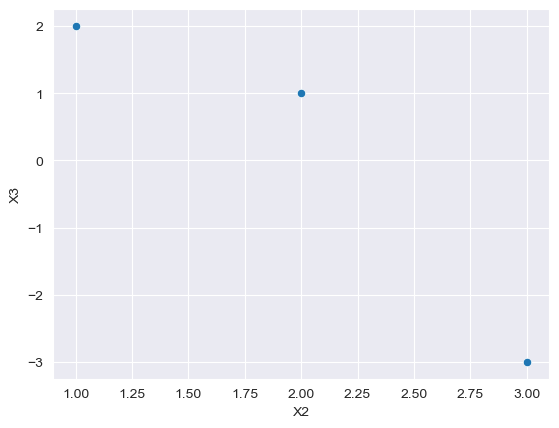

In [13]:
sns.scatterplot(data=df, x="X2", y="X3")

De la grafica se puede que es plausible generar una línea recta que una los puntos con un cierto margen de error pero no tan alto. 

# 2. La demanda de rosas

En la tabla 7.6 (archivo anexo) se presenta la información trimestral sobre estas variables:

**TABLA 7.6**  
Demanda trimestral de rosas en el área metropolitana de Detroit, de 1971-III a 1975-II

| Año y trimestre | Y (docenas vendidas) | X₂ ($/docena, rosas) | X₃ ($/docena, claveles) | X₄ ($/semana, ingreso familiar) | X₅ (tendencia) |
|-----------------|---------------------|----------------------|-------------------------|----------------------------------|----------------|
| 1971-III        | 11 484              | 2.26                 | 3.49                    | 158.11                           | 1              |
| 1971-IV         | 9 348               | 2.54                 | 2.85                    | 173.36                           | 2              |
| 1972-I          | 8 429               | 3.07                 | 4.06                    | 165.26                           | 3              |
| 1972-II         | 10 079              | 2.91                 | 3.64                    | 172.92                           | 4              |
| 1972-III        | 9 240               | 2.73                 | 3.64                    | 188.42                           | 5              |
| 1972-IV         | 8 862               | 2.77                 | 3.66                    | 198.62                           | 6              |
| 1973-I          | 6 216               | 3.59                 | 3.76                    | 186.28                           | 7              |
| 1973-II         | 8 263               | 2.60                 | 3.13                    | 180.49                           | 8              |
| 1973-III        | 7 315               | 2.89                 | 3.20                    | 183.33                           | 9              |
| 1973-IV         | 7 911               | 2.94                 | 3.12                    | 183.57                           | 10             |
| 1974-I          | 9 656               | 3.77                 | 3.65                    | 181.87                           | 11             |
| 1974-II         | 10 154              | 3.64                 | 3.60                    | 185.00                           | 12             |
| 1974-III        | 9 350               | 2.94                 | 3.25                    | 184.00                           | 13             |
| 1974-IV         | 8 886               | 2.94                 | 3.12                    | 188.20                           | 14             |
| 1975-I          | 7 718               | 4.24                 | 3.58                    | 175.67                           | 15             |
| 1975-II         | 5 872               | 3.69                 | 3.53                    | 188.00                           | 16             |

\* El autor agradece a Joe Walsh por recopilar estos datos de un mayorista en el área metropolitana de Detroit y por su subsecuente procesamiento.

- $ Y = $ cantidad de rosas vendidas, docenas
- $ X_2 = $ precio promedio al mayoreo de las rosas, $/docena
- $ X_3 = $ precio promedio al mayoreo de los claveles, $/docena
- $ X_4 = $ ingreso familiar disponible promedio semanal, $/semana
- $ X_5 = $ variable de tendencia que toma valores de 1, 2, y así sucesivamente, durante el periodo 1971-III a 1975-II en el área metropolitana de Detroit.

Se le pide considerar las siguientes funciones de demanda:

- $ Y_t = \alpha_1 + \alpha_2 X_{2t} + \alpha_3 X_{3t} + \alpha_4 X_{4t} + \alpha_5 X_{5t} + u_t $
- $ \ln Y_t = \beta_1 + \beta_2 \ln X_{2t} + \beta_3 \ln X_{3t} + \beta_4 \ln X_{4t} + \beta_5 \ln X_{5t} + u_t $

### a) Estime los parámetros del modelo lineal e interprete los resultados.

In [14]:
df2 = pd.read_excel(T7_6_DIR , header=11)
df2

,YEAR,Y,X2,X3,X4,X5
0,1971.3,11484,2.26,3.49,158.11,1
1,1971.4,9348,2.54,2.85,173.36,2
2,1972.1,8429,3.07,4.06,165.26,3
3,1972.2,10079,2.91,3.64,172.92,4
4,1972.3,9240,2.73,3.21,178.46,5
5,1972.4,8862,2.77,3.66,198.62,6
6,1973.1,6216,3.59,3.76,186.28,7
7,1973.2,8253,3.23,3.49,188.98,8
8,1973.3,8038,2.60,3.13,180.49,9
9,1973.4,7476,2.89,3.20,183.33,10


In [15]:
model_df2_01= (
    smf.ols(
        formula='Y~X2+X3+X4+X5',
        data=df2
    )
    .fit()
)
model_df2_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     13.89
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           0.000281
Time:                        07:51:22   Log-Likelihood:                -129.74
No. Observations:                  16   AIC:                             269.5
Df Residuals:                      11   BIC:                             273.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.082e+04   5988.348      1.806      0.098   -2364.223     2.4e+04
X2         -2227.7044    920.466     -2.420      0.034   -4253.636    -201.773
X3          1251.1412   1157.021      1.081      0.303   -1295.444    3797.726
X4             6.2830     30.622      0.205      0.841     -61.115      73.681
X5          -197.3999    101.561     -1.944      0.078    -420.935      26.135
==============================================================================
Omnibus:                        1.968   Durbin-Watson:                   2.334
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                1.094
Skew:                           0.639   Prob(JB):                        0.579
Kurtosis:                       2.904   Cond. No.                     4.48e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### b) Estime los parámetros del modelo log-lineal e interprete los resultados.

In [16]:
df2["logY"] = np.log(df2["Y"])
df2["logX2"] = np.log(df2["X2"])
df2["logX3"] = np.log(df2["X3"])
df2["logX4"] = np.log(df2["X4"])
df2["logX5"] = np.log(df2["X5"])
df2.head()

,YEAR,Y,X2,X3,X4,X5,logY,logX2,logX3,logX4,logX5
0,1971.3,11484,2.26,3.49,158.11,1,9.348710,0.815365,1.249902,5.063291,0.000000
1,1971.4,9348,2.54,2.85,173.36,2,9.142918,0.932164,1.047319,5.155370,0.693147
2,1972.1,8429,3.07,4.06,165.26,3,9.039433,1.121678,1.401183,5.107520,1.098612
3,1972.2,10079,2.91,3.64,172.92,4,9.218209,1.068153,1.291984,5.152829,1.386294
4,1972.3,9240,2.73,3.21,178.46,5,9.131297,1.004302,1.166271,5.184364,1.609438


In [17]:
model_df2_02= (
    smf.ols(
        formula='logY~logX2+logX3+logX4+logX5',
        data=df2
    )
    .fit()
)
model_df2_02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   logY   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     9.635
Date:                Sat, 07 Sep 2024   Prob (F-statistic):            0.00134
Time:                        07:51:22   Log-Likelihood:                 8.7532
No. Observations:                  16   AIC:                            -7.506
Df Residuals:                      11   BIC:                            -3.643
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6268      6.148      0.102      0.921     -12.905      14.159
logX2         -1.2736      0.527     -2.418      0.034      -2.433      -0.114
logX3          0.9373      0.659      1.422      0.183      -0.514       2.388
logX4          1.7130      1.201      1.426      0.181      -0.930       4.356
logX5         -0.1816      0.128     -1.420      0.183      -0.463       0.100
==============================================================================
Omnibus:                        0.501   Durbin-Watson:                   1.783
Prob(Omnibus):                  0.779   Jarque-Bera (JB):                0.005
Skew:                           0.043   Prob(JB):                        0.997
Kurtosis:                       3.027   Cond. No.                         872.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Considerando el siguiente modelo:

- $ \ln Y_t = \beta_1 + \beta_2 \ln X_{2t} + \beta_3 \ln X_{3t} + \beta_4 \ln X_{4t} + \beta_5 \ln X_{5t} + u_t $

Se tiene que:

In [18]:
print("Modelo base")
print(f"Y_t = {model_df2_01.params['Intercept']:.4f} + {model_df2_01.params['X2']:.4f} X2 + {model_df2_01.params['X3']:.4f} X3 + {model_df2_01.params['X4']:.4f} X4 + {model_df2_01.params['X5']:.4f} X5")
print("Modelo elsticidad")
print(f"ln Y_t = {model_df2_02.params['Intercept']:.4f} + {model_df2_02.params['logX2']:.4f} ln X2 + {model_df2_02.params['logX3']:.4f} ln X3 + {model_df2_02.params['logX4']:.4f} ln X4 + {model_df2_02.params['logX5']:.4f} ln X5")

Modelo base
Y_t = 10816.0433 + -2227.7044 X2 + 1251.1412 X3 + 6.2830 X4 + -197.3999 X5
Modelo elsticidad
ln Y_t = 0.6268 + -1.2736 ln X2 + 0.9373 ln X3 + 1.7130 ln X4 + -0.1816 ln X5


### c) $ \beta_2 $, $ \beta_3 $ y $ \beta_4 $ dan respectivamente las elasticidades de la demanda respecto del precio propio, precio cruzado e ingreso. ¿Cuáles son, a priori, los signos de estas elasticidades? ¿Concuerdan estos resultados con las expectativas a priori?

| Coeficiente | Modelo Base | Modelo con Elasticidad |
|-------------|--------------|-----------------------|
| $\beta_2$   | Negativo     | Negativo              |
| $\beta_3$   | Positivo     | Positivo              |
| $\beta_4$   | Positivo     | Positivo              |
| $\beta_5$   | Negativo     | Negativo              |

### d) ¿Cómo calcularía las elasticidades precio propio, precio cruzado e ingreso en el modelo lineal?

Considerando $\frac{\partial Y}{\partial X_i} \frac{\bar{X_i}}{\bar{Y}}$ Que para el caso de log- log corresponde a los coeficiente de las betas.

### e) Con base en el análisis, ¿cuál modelo, si existe, escogería y por qué?

Ambos modelos aparentemente cuentan con buenas métricas, por lo que me quedaría con el modelo más sencillo sin la transformación. De tal forma que sea lo más entendible al momento de manejarlo. 

# 3. Desembolsos del presupuesto de defensa de Estados Unidos, 1962-1981

| Año  | Desembolsos del presupuesto de defensa (Y₁) | PNB (X₁) | Ventas/Asistencias militares de Estados Unidos (X₂) | Ventas de la industria aeroespacial (X₃) | Conflictos 100,000+ (X₄) |
|------|--------------------------------------------|---------|-----------------------------------------------------|------------------------------------------|------------------------|
| 1962 | 51.1                                       | 560.3   | 0.6                                                 | 16                                       | 0                      |
| 1963 | 52.3                                       | 590.5   | 0.9                                                 | 16.4                                     | 0                      |
| 1964 | 53.6                                       | 632.4   | 1.1                                                 | 16.7                                     | 0                      |
| 1965 | 49.6                                       | 684.9   | 1.4                                                 | 17                                       | 1                      |
| 1966 | 56.8                                       | 749.9   | 1.6                                                 | 20.2                                     | 1                      |
| 1967 | 70.1                                       | 793.9   | 1.0                                                 | 23.4                                     | 1                      |
| 1968 | 80.5                                       | 865.0   | 0.8                                                 | 25.6                                     | 1                      |
| 1969 | 81.2                                       | 931.4   | 1.5                                                 | 24.6                                     | 1                      |
| 1970 | 80.3                                       | 992.7   | 1.0                                                 | 24.8                                     | 1                      |
| 1971 | 77.7                                       | 1077.6  | 1.5                                                 | 21.7                                     | 1                      |
| 1972 | 78.3                                       | 1185.9  | 2.95                                                | 21.5                                     | 1                      |
| 1973 | 74.5                                       | 1326.4  | 4.8                                                 | 24.3                                     | 0                      |
| 1974 | 77.8                                       | 1434.2  | 10.3                                                | 26.8                                     | 0                      |
| 1975 | 85.6                                       | 1549.2  | 16.0                                                | 29.5                                     | 0                      |
| 1976 | 89.4                                       | 1718.0  | 14.7                                                | 30.4                                     | 0                      |
| 1977 | 97.5                                       | 1918.3  | 8.3                                                 | 33.3                                     | 0                      |
| 1978 | 105.2                                      | 2163.9  | 11.0                                                | 38.0                                     | 0                      |
| 1979 | 117.7                                      | 2417.8  | 13.0                                                | 46.2                                     | 0                      |
| 1980 | 135.9                                      | 2633.1  | 15.3                                                | 57.6                                     | 0                      |
| 1981 | 162.1                                      | 2937.7  | 18.0                                                | 68.9                                     | 0                      |

Para explicar el presupuesto de defensa de Estados Unidos, considere el siguiente modelo:

- $ Y_t = \beta_1 + \beta_2 X_{2t} + \beta_3 X_{3t} + \beta_4 X_{4t} + \beta_5 X_{5t} + u_t $

Donde:

- $ Y_t = $ desembolsos del presupuesto de defensa durante el año t, $ miles de millones
- $ X_2t = $ PNB durante el año t, $ miles de millones
- $ X_3t = $ ventas militares de Estados Unidos/ayuda en el año t, $ miles de millones
- $ X_4t = $ ventas de la industria aeroespacial, $ miles de millones
- $ X_5t = $ conflictos militares que implican a más de 100,000 soldados. Esta variable adquiere el valor de 1 cuando participan 100,000 soldados o más, y es igual a cero cuando el número de soldados no llega a 100,000.

Para probar este modelo, se proporciona la información en la tabla 7.8 (archivo anexo).

### a) Estime los parámetros de este modelo y sus errores estándar, y obtenga $ R^2 $ y $ R^2 $ ajustada.

In [19]:
df3 = pd.read_excel(T7_8_DIR , header=11)
df3

,YEAR,Y,X2,X3,X4,X5
0,1962,51.1,560.3,0.60,16.0,0
1,1963,52.3,590.5,0.90,16.4,0
2,1964,53.6,632.4,1.10,16.7,0
3,1965,49.6,684.9,1.40,17.0,1
4,1966,56.8,749.9,1.60,20.2,1
5,1967,70.1,793.9,1.00,23.4,1
6,1968,80.5,865.0,0.80,25.6,1
7,1969,81.2,931.4,1.50,24.6,1
8,1970,80.3,992.7,1.00,24.8,1
9,1971,77.7,1077.6,1.50,21.7,1


In [20]:
model_df3_01= (
    smf.ols(
        formula='Y~X2+X3+X4+X5',
        data=df3
    )
    .fit()
)
model_df3_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     163.7
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           3.52e-12
Time:                        07:52:14   Log-Likelihood:                -57.206
No. Observations:                  20   AIC:                             124.4
Df Residuals:                      15   BIC:                             129.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.4434      3.406      5.708      0.000      12.184      26.703
X2             0.0181      0.006      2.817      0.013       0.004       0.032
X3            -0.2842      0.457     -0.622      0.544      -1.259       0.690
X4             1.3432      0.259      5.181      0.000       0.791       1.896
X5             6.3318      3.030      2.090      0.054      -0.126      12.789
==============================================================================
Omnibus:                        7.350   Durbin-Watson:                   0.910
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                4.891
Skew:                          -1.132   Prob(JB):                       0.0867
Kurtosis:                       3.861   Cond. No.                     5.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### b) Comente los resultados, considerando cualquier expectativa a priori que tenga sobre la relación entre $ Y $ y las diversas variables $ X $.

El modelo se ve de la siguiente manera:

In [21]:
print(f"Y_t = {model_df3_01.params['Intercept']:.4f} + {model_df3_01.params['X2']:.4f} X2 + {model_df3_01.params['X3']:.4f} X3 + {model_df3_01.params['X4']:.4f} X4 + {model_df3_01.params['X5']:.4f} X5")

Y_t = 19.4434 + 0.0181 X2 + -0.2842 X3 + 1.3432 X4 + 6.3318 X5


- Tiene una $R^2$ muy alta, así como la $R^2$ ajustada. Por lo que implica que existe consistencia en la regresión. 
- La variable más representativa o que explica mejor la Y es la variable $X_5$, que corresponde a conflictos militares que implican a más de 100,000 soldados.

### c) ¿Qué otra(s) variable(s) incluiría en el modelo y por qué?

Por los valores observados, parece que no hace falta agregar más variables ya que lo volvería más robusto pero quizás con menos precisión o riesgo a sobre representar con los datos actuales, fallando con nuevos datos.

# 4. Gasto de consumo real, ingreso real, riqueza real y tasas de interés reales de Estados Unidos de 1947 a 2000.

En la tabla 7.12 (archivo anexo) se presenta la información de estas variables:

| Año  | C      | Yd      | Riqueza   | Tasa de Interés |
|------|--------|---------|-----------|-----------------|
| 1947 | 976.4  | 1035.2  | 5166.8    | -10.351         |
| 1948 | 998.1  | 1090.0  | 5280.8    | -4.720          |
| 1949 | 1025.3 | 1095.6  | 5607.4    | 1.044           |
| 1950 | 1090.9 | 1192.7  | 5759.5    | 0.407           |
| 1951 | 1107.1 | 1227.0  | 6086.1    | -5.283          |
| 1952 | 1142.4 | 1266.8  | 6243.9    | -0.277          |
| 1953 | 1197.2 | 1327.5  | 6355.6    | 0.561           |
| 1954 | 1221.9 | 1344.0  | 6797.0    | -0.138          |
| 1955 | 1310.4 | 1433.8  | 7172.2    | 0.262           |
| 1956 | 1348.8 | 1502.3  | 7375.2    | -0.736          |
| 1957 | 1381.8 | 1539.5  | 7315.3    | -0.261          |
| 1958 | 1393.0 | 1553.7  | 7870.0    | -0.575          |
| 1959 | 1470.7 | 1623.8  | 8188.1    | 2.296           |
| 1960 | 1510.8 | 1664.8  | 8351.8    | 1.511           |
| 1961 | 1541.2 | 1720.0  | 8971.9    | 1.296           |
| 1962 | 1617.3 | 1803.5  | 9091.5    | 1.396           |
| 1963 | 1684.0 | 1871.5  | 9436.1    | 2.058           |
| 1964 | 1784.8 | 2006.9  | 10003.4   | 2.027           |
| 1965 | 1897.6 | 2131.0  | 10562.8   | 2.112           |
| 1966 | 2006.1 | 2244.6  | 10522.0   | 2.020           |
| 1967 | 2066.2 | 2340.5  | 11312.1   | 1.213           |
| 1968 | 2184.2 | 2448.2  | 12145.4   | 1.055           |
| 1969 | 2264.8 | 2524.3  | 11672.3   | 1.732           |
| 1970 | 2317.5 | 2630.0  | 11650.0   | 1.166           |
| 1971 | 2405.2 | 2745.3  | 12312.9   | -0.712          |
| 1972 | 2550.5 | 2874.3  | 13499.9   | -0.156          |
| 1973 | 2675.9 | 3072.3  | 13081.0   | 1.414           |
| 1974 | 2653.7 | 3051.9  | 11868.8   | -1.043          |
| 1975 | 2710.9 | 3108.5  | 12634.4   | -3.534          |
| 1976 | 2868.9 | 3243.5  | 13456.8   | -0.657          |
| 1977 | 2992.1 | 3360.7  | 13786.3   | -1.190          |
| 1978 | 3124.7 | 3527.5  | 14450.5   | 0.113           |
| 1979 | 3203.2 | 3628.6  | 15340.0   | 1.704           |
| 1980 | 3193.0 | 3658.0  | 15965.0   | 2.298           |
| 1981 | 3236.0 | 3741.1  | 15965.0   | 4.704           |
| 1982 | 3275.5 | 3791.7  | 16312.5   | 4.449           |
| 1983 | 3454.3 | 3906.9  | 16944.8   | 4.691           |
| 1984 | 3640.6 | 4207.6  | 17526.7   | 5.848           |
| 1985 | 3820.9 | 4347.8  | 19068.3   | 4.331           |
| 1986 | 3981.2 | 4486.6  | 20530.0   | 3.768           |
| 1987 | 4113.4 | 4582.5  | 21235.7   | 2.819           |
| 1988 | 4279.5 | 4784.1  | 22332.0   | 3.287           |
| 1989 | 4393.7 | 4906.5  | 23659.8   | 4.318           |
| 1990 | 4474.5 | 5014.2  | 23105.1   | 3.595           |
| 1991 | 4466.6 | 5033.0  | 24050.2   | 1.803           |
| 1992 | 4594.5 | 5189.3  | 24418.2   | 1.007           |
| 1993 | 4748.9 | 5261.3  | 25092.3   | 0.625           |
| 1994 | 4928.1 | 5397.2  | 25218.6   | 2.206           |
| 1995 | 5075.6 | 5539.1  | 27439.7   | 3.333           |
| 1996 | 5237.5 | 5677.7  | 29448.2   | 3.083           |
| 1997 | 5423.9 | 5854.5  | 32664.1   | 3.120           |
| 1998 | 5683.7 | 6168.6  | 35587.0   | 3.584           |
| 1999 | 5968.4 | 6320.0  | 39591.3   | 3.245           |
| 2000 | 6257.8 | 6539.2  | 38167.7   | 3.576           |


### a) Con la información de la tabla, estime la función de consumo lineal usando los datos de ingreso, riqueza y tasa de interés. ¿Cuál es la ecuación ajustada?

In [25]:
df4 = pd.read_excel(T7_12_DIR , header=3)
df4.head()

,Year,C,Yd,wealth,interest
0,1947,976.4,1035.2,5166.814815,-10.350935
1,1948,998.1,1090.0,5280.757098,-4.719804
2,1949,1025.3,1095.6,5607.351225,1.044063
3,1950,1090.9,1192.7,5759.514617,0.407346
4,1951,1107.1,1227.0,6086.055777,-5.283152


In [28]:
model_df4_01= (
    smf.ols(
        formula='C~Yd+wealth+interest',
        data=df4
    )
    .fit()
)
model_df4_01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      C   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 2.784e+04
Date:                Sat, 07 Sep 2024   Prob (F-statistic):           1.52e-80
Time:                        08:00:57   Log-Likelihood:                -270.69
No. Observations:                  54   AIC:                             549.4
Df Residuals:                      50   BIC:                             557.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.6327     12.827     -1.609      0.114     -46.397       5.131
Yd             0.7340      0.014     53.376      0.000       0.706       0.762
wealth         0.0360      0.002     14.488      0.000       0.031       0.041
interest      -5.5212      2.307     -2.394      0.020     -10.154      -0.888
==============================================================================
Omnibus:                        9.692   Durbin-Watson:                   1.311
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               11.585
Skew:                           0.660   Prob(JB):                      0.00305
Kurtosis:                       4.846   Cond. No.                     4.52e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
print(f"Y_t = {model_df4_01.params['Intercept']:.4f} + {model_df4_01.params['Yd']:.4f} Yd + {model_df4_01.params['wealth']:.4f} wealth {model_df4_01.params['interest']:.4f} interest")

Y_t = -20.6327 + 0.7340 Yd + 0.0360 wealth -5.5212 interest


donde:

- $ Y_t $ representa el **gasto de consumo**,
- $ Yd $ es el **ingreso disponible**,
- $ \text{wealth} $ es la **riqueza**,
- $ \text{interest} $ es la **tasa de interés**,

los coeficientes estimados indican lo siguiente:

1. **Intercepto (-20.6327)**: Si el ingreso disponible, la riqueza y la tasa de interés fueran cero (lo que puede no ser realista en la práctica), el gasto de consumo sería negativo en aproximadamente 20.6327 unidades. Aunque este valor no tiene una interpretación directa significativa, muestra el nivel base del gasto cuando no hay contribución de las variables independientes.

2. **Coeficiente del ingreso disponible (0.7340)**: Por cada unidad adicional de ingreso disponible (\(Yd\)), el gasto de consumo (\(Y_t\)) aumenta en 0.7340 unidades, manteniendo constante el nivel de riqueza y la tasa de interés. Esto sugiere una **relación positiva** entre el ingreso disponible y el gasto de consumo, lo cual es esperable, ya que a medida que las personas tienen más ingresos disponibles, tienden a gastar más.

3. **Coeficiente de la riqueza (0.0360)**: Por cada unidad adicional de riqueza, el gasto de consumo aumenta en 0.0360 unidades, manteniendo constante el ingreso disponible y la tasa de interés. Aunque el coeficiente es pequeño, indica que un aumento en la riqueza también tiende a incrementar el gasto de consumo, pero en menor medida comparado con el ingreso disponible.

4. **Coeficiente de la tasa de interés (-5.5212)**: Por cada unidad adicional en la tasa de interés, el gasto de consumo disminuye en 5.5212 unidades, manteniendo constantes el ingreso disponible y la riqueza. Esto implica una **relación negativa** entre la tasa de interés y el gasto de consumo, lo cual tiene sentido, ya que a medida que aumentan las tasas de interés, los costos de endeudamiento son mayores, lo que puede desincentivar el consumo.

En resumen, los coeficientes indican que el ingreso disponible y la riqueza tienen efectos positivos en el gasto de consumo, mientras que las tasas de interés altas tienden a reducir el consumo.